# Stock Pain Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol = '^NSEBANK'

In [3]:
df = yf.download("^NSEBANK", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [6]:
def pain_ratio(stock, returns):
    max14 = stock['Adj Close'].rolling(window=14,min_periods=1).max()
    drawdown = 100*((stock['Adj Close']-max14)/max14)
    pain = drawdown.rolling(window=14).mean()
    pain_index = pain.dropna()
    annual_return = returns.mean() * 252
    pain_ratio = (annual_return - rf) / pain_index.sum()
    return pain_ratio

Text(0, 0.5, 'Pain Ratio')

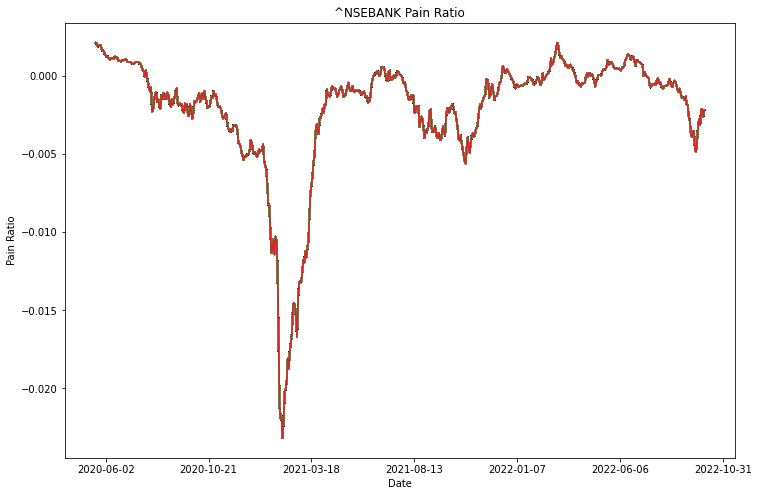

In [7]:
# Compute the running Pain ratio
running = [pain_ratio(df[i-90:i], returns[i-90:i]) for i in range(90, len(returns))]

# Plot running Pain ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([df['Adj Close'].index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Pain Ratio')
plt.xlabel('Date')
plt.ylabel('Pain Ratio')

In [8]:
pain_ratio = pain_ratio(df, returns)

Text(0, 0.5, 'Pain Ratio')

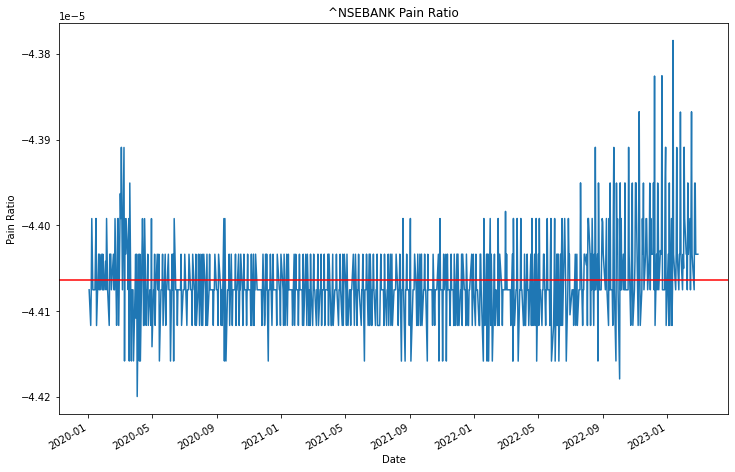

In [9]:
pain_ratio .plot(figsize=(12,8), title = symbol + ' Pain Ratio')
plt.axhline(y=pain_ratio.mean(), color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Pain Ratio')